In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version
from scipy import stats as st

#### KDE a mano

In [7]:
x = st.beta.rvs(5, 12, size=100)

Text(0, 0.5, '1/N dN/dx')

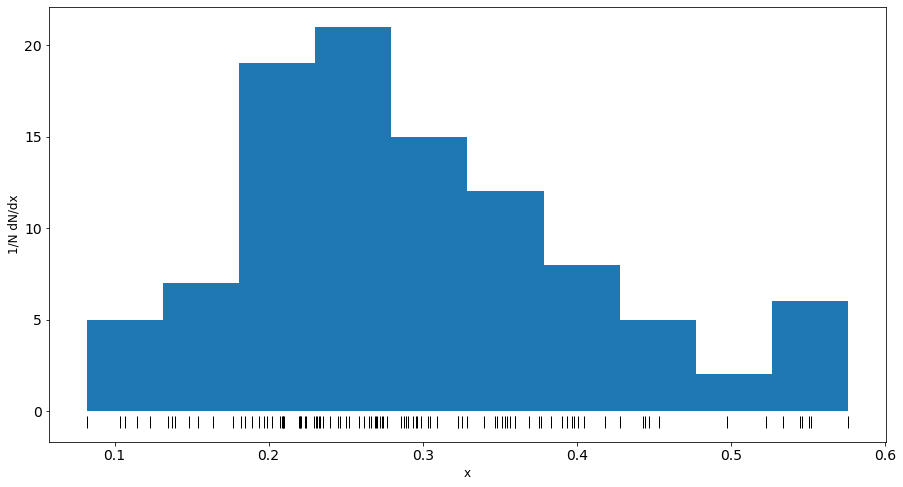

In [22]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(x)
ax.plot(x, np.full_like(x, -0.6), '|k', markersize=12)
ax.set_xlabel('x')
ax.set_ylabel('1/N dN/dx')

In [31]:
x_d = np.linspace(x.min(), x.max(), 1000)

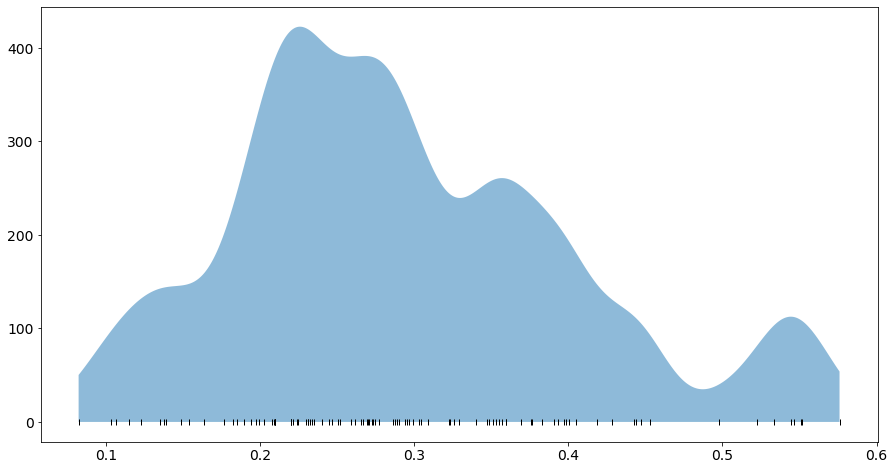

In [81]:
h = 0.02
density = sum(st.norm(xi,h).pdf(x_d) for xi in x)

fig, ax = plt.subplots(figsize=(15,8))
plt.fill_between(x_d, density, alpha=0.5) 
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1) 

In [42]:
h = 0.02
K = st.norm(scale=h)
from functools import partial as fp

In [43]:
K = fp(st.norm, scale=h)

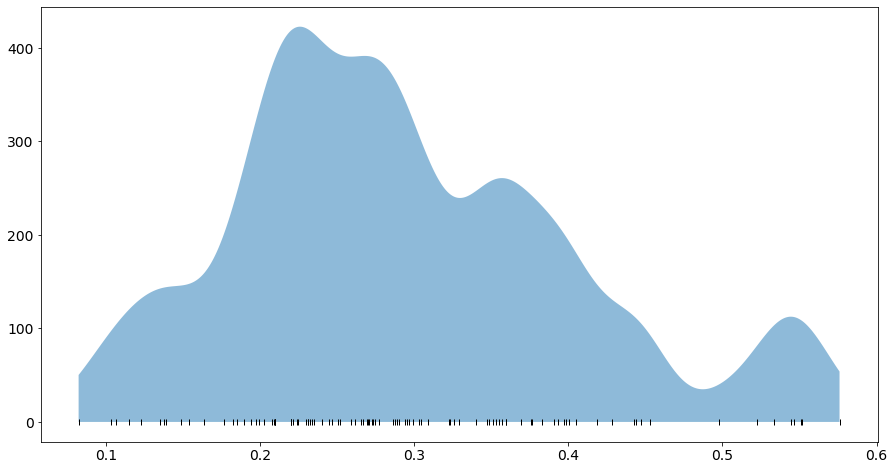

In [82]:
density = sum(K(loc=xi).pdf(x_d) for xi in x)

fig, ax = plt.subplots(figsize=(15,8))
plt.fill_between(x_d, density, alpha=0.5) 
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

#### KDE con paquetes

In [55]:
from sklearn.neighbors import KernelDensity

In [59]:
#KernelDensity?

In [65]:
kde = KernelDensity(bandwidth=h, kernel='gaussian')
kde.fit(x[:, None])

KernelDensity(bandwidth=0.02)

In [68]:
#kde?

In [70]:
#dir(kde)

In [75]:
#kde.score_samples?

In [71]:
logprob = kde.score_samples(x_d[:, None])

In [72]:
prob = np.exp(logprob)

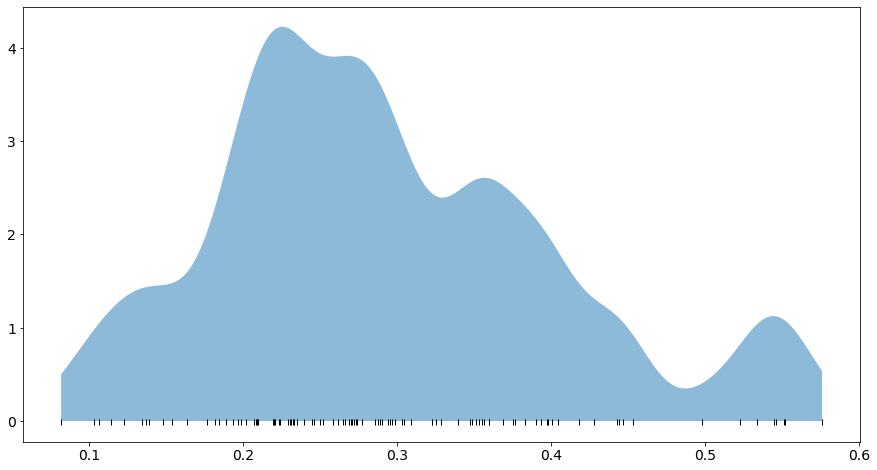

In [83]:
fig, ax = plt.subplots(figsize=(15,8))

plt.fill_between(x_d, prob, alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

#### OTRO EJEMPLO

In [13]:
density_param = {'density': True}

In [27]:
np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

Text(0.5, 0, 'x')

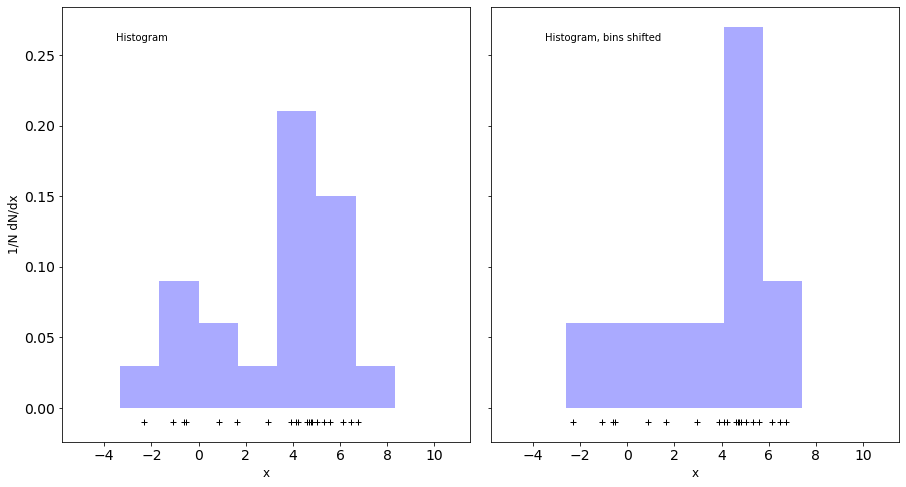

In [42]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,8))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0].hist(X[:, 0], bins=bins, fc='#AAAAFF', **density_param)
ax[0].text(-3.5, 0.26, "Histogram")

# histogram 2
ax[1].hist(X[:, 0], bins=bins + 0.75, fc='#AAAAFF', **density_param)
ax[1].text(-3.5, 0.26, "Histogram, bins shifted")

ax[0].plot(X[:, 0], np.full(X.shape[0], -0.01), '+k')
ax[1].plot(X[:, 0], np.full(X.shape[0], -0.01), '+k')
    
ax[0].set_ylabel('1/N dN/dx')
ax[0].set_xlabel('x')
ax[1].set_xlabel('x')

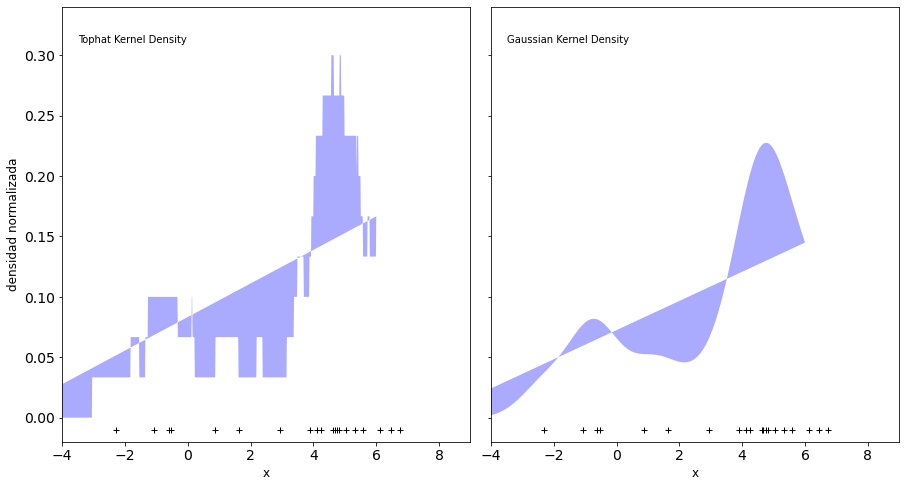

In [47]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,8))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

ax[0].set_ylabel('densidad normalizada')

for axi in ax:
    axi.set_xlabel('x')

# ----------------------------------------------------------------------
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

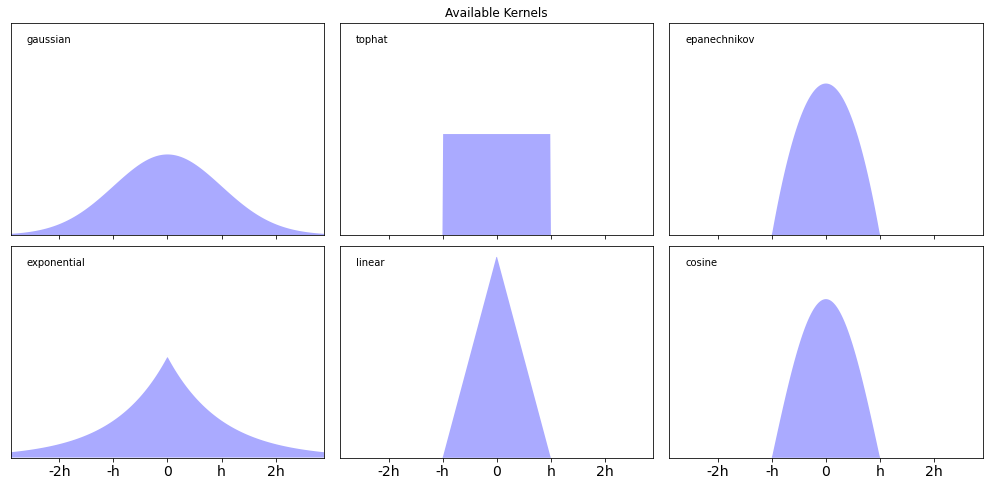

In [48]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15, 8))
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov',
                            'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels')

# ----------------------------------------------------------------------
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

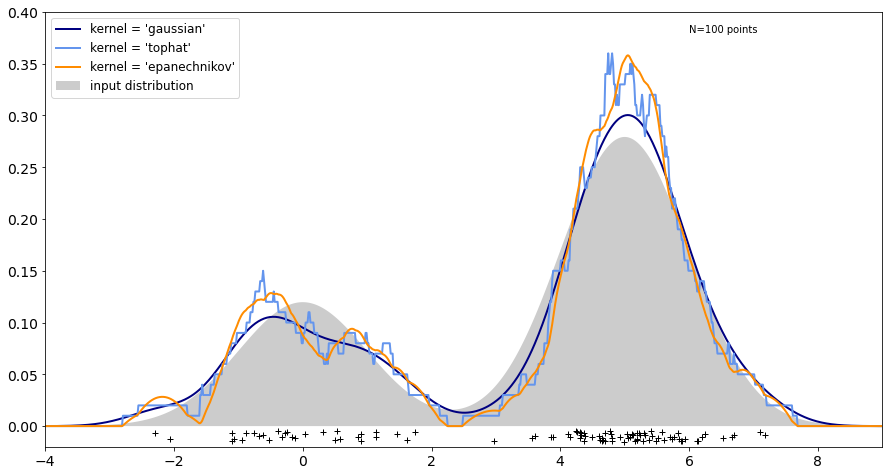

In [49]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
colors = ['navy', 'cornflowerblue', 'darkorange']
kernels = ['gaussian', 'tophat', 'epanechnikov']
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

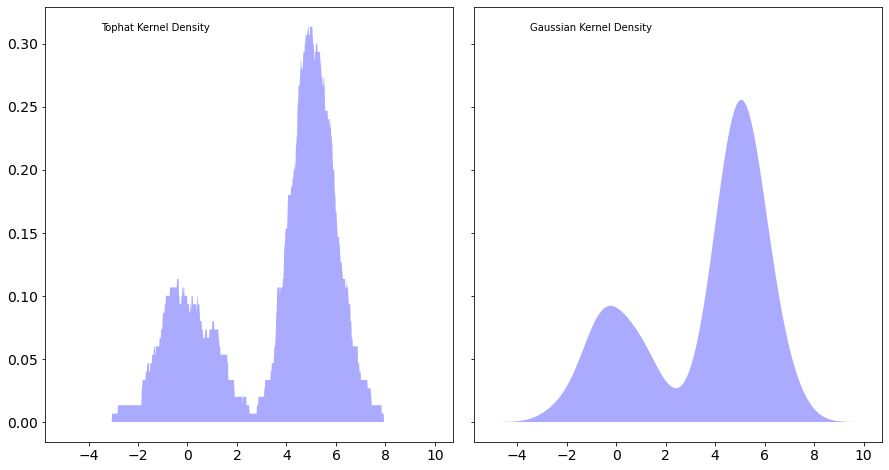

In [76]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 8))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1].text(-3.5, 0.31, "Gaussian Kernel Density")
plt.show()